# Dataset

In [117]:
import math

import torch
import pandas as pd
import numpy as np

In [118]:
from pathlib import Path

DATA_PATH = Path('data/')
DATA_PATH.mkdir(parents=True, exist_ok=True)

DATA_CACHE = Path('data/cache_dir/')
DATA_CACHE.mkdir(parents=True, exist_ok=True)

DATA_PATH_SAVE_MODELS = Path('data/models/')
DATA_PATH_SAVE_MODELS.mkdir(parents=True, exist_ok=True)

DATA_SYNTHETIC = Path('synthetic/')
DATA_SYNTHETIC.mkdir(parents=True, exist_ok=True)

pd.set_option('display.max_colwidth', 500) 

## [nanyy1025/covid_fake_news](https://huggingface.co/datasets/nanyy1025/covid_fake_news)

Датасет `nanyy1025/covid_fake_news` на Hugging Face содержит 10 700 записей, каждая из которых представляет собой твит, связанный с COVID-19, с меткой "real" (реальный) или "fake" (фейковый). Датасет разделен на три части: обучающая выборка (6 420 записей), валидационная выборка (2 140 записей) и тестовая выборка (2 140 записей). Данные представлены в формате CSV и предназначены для задач классификации текста и zero-shot классификации. Датасет был использован в исследовании "Fighting an Infodemic: COVID-19 Fake News Dataset" (arXiv:2011.03327). ([Hugging Face](https://huggingface.co/datasets/nanyy1025/covid_fake_news?utm_source=chatgpt.com)) 

```bibtex
@misc{patwa2020fighting,
title={Fighting an Infodemic: COVID-19 Fake News Dataset}, 
author={Parth Patwa and Shivam Sharma and Srinivas PYKL and Vineeth Guptha and Gitanjali Kumari and Md Shad Akhtar and Asif Ekbal and Amitava Das and Tanmoy Chakraborty},
year={2020},
eprint={2011.03327},
archivePrefix={arXiv},
primaryClass={cs.CL}
}
```

In [119]:
from datasets import load_dataset

In [120]:
def load_and_merge_nanyy1025_dataset(dataset_name: str = "nanyy1025/covid_fake_news",
                                     cache_dir=None) -> pd.DataFrame:
    dataset = load_dataset(dataset_name, cache_dir=cache_dir)

    train_df = dataset['train'].to_pandas()
    test_df = dataset['test'].to_pandas()
    validation_df = dataset['validation'].to_pandas()
    merged_df: pd.DataFrame = pd.concat([train_df, test_df, validation_df], ignore_index=True)
    merged_df.rename(columns={'tweet': 'text'}, inplace=True)
    return merged_df

nanyy1025_df = load_and_merge_nanyy1025_dataset( "nanyy1025/covid_fake_news", DATA_CACHE)

In [121]:
nanyy1025_df.head()

,id,text,label
0,1,The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.,real
1,2,States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux,real
2,3,Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ,real
4,5,Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC. https://t.co/1pYW6cWRaS,real


In [122]:
nanyy1025_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10700 non-null  int64 
 1   text    10700 non-null  object
 2   label   10700 non-null  object
dtypes: int64(1), object(2)
memory usage: 250.9+ KB


## [justinqbui/covid_fact_checked_google_api](https://huggingface.co/datasets/justinqbui/covid_fact_checked_google_api)

Датасет **justinqbui/covid_fact_checked_google_api** с Hugging Face представляет собой выборку проверенных фактов, связанных с COVID-19, собранных с использованием Google Fact Checker API. Вот его основные характеристики:

1. **Общий объем данных:**
   - Содержит 3 043 записи.
   - Первоначально было собрано 10 000 фактов, но для упрощения включены только те записи, где рейтинг был представлен одним словом — "false" (ложь) или "true" (правда). Около 90% фактов в датасете оценены как ложные.

2. **Модальности и форматы:**
   - Тип данных: текст.
   - Формат: CSV.
   - Также доступен в формате Parquet.

3. **Описание данных:**
   - Поля датасета:
     - `text`: текст проверенного факта.
     - `label`: метка правдивости (`true` или `false`).
   - Аннотации созданы экспертами.
   - Язык: английский (en-US).
   - Датасет является монолингвальным.

In [123]:
def load_and_merge_justinqbui_dataset(dataset_name: str = "justinqbui/covid_fact_checked_google_api",
                                     cache_dir=None) -> pd.DataFrame:
    dataset = load_dataset(dataset_name, cache_dir=cache_dir)
    return dataset['train'].to_pandas()

justinqbui_1_df = load_and_merge_justinqbui_dataset( "justinqbui/covid_fact_checked_google_api", DATA_CACHE)

Repo card metadata block was not found. Setting CardData to empty.


In [124]:
justinqbui_1_df.head()

,Unnamed: 0,text,label
0,0,Study finds 5G technology a ‘significant factor’ in higher COVID case and death rates,False
1,1,"Society is “choosing blood clots and heart problems over cold and flu symptoms, or even no symptoms at all.”",False
2,2,"Dr. Anthony Fauci, the director of the National Institute of Allergy and Infectious Diseases (NIAID), has said he wants Americans to receive four COVID-19 vaccine shots each year.",False
3,3,"As of early December 2021, no one worldwide who tested positive for the omicron variant of the coronavirus had died.",True
4,4,the image shows a fence in a German mall separating people vaccinated against COVID-19 from those who are unvaccinated.,False


In [125]:
justinqbui_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3043 non-null   int64 
 1   text        3043 non-null   object
 2   label       3043 non-null   bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 50.6+ KB


In [126]:
justinqbui_1_df['label'].value_counts()

label
False    2929
True      114
Name: count, dtype: int64

## [justinqbui/covid_fact_checked_polifact](https://huggingface.co/datasets/justinqbui/covid_fact_checked_polifact)

Датасет **justinqbui/covid_fact_checked_polifact** с Hugging Face включает записи, связанные с проверкой фактов о COVID-19, собранных с помощью автоматического веб-скрейпера, который извлек данные из PolitiFact COVID Fact Checker. Вот его ключевые характеристики:

1. **Общий объем данных:**
   - Содержит 1 190 записей.
   - Датасет состоит из утверждений и их оценки на правдивость.

2. **Модальности и форматы:**
   - Тип данных: текст.
   - Формат: CSV.
   - Также доступен в формате Parquet.

3. **Описание данных:**
   - Поля датасета:
     - `claim`: текст утверждения.
     - `rating`: оценка, присвоенная PolitiFact (7 значений: *half-true*, *full-flop*, *pants-fire*, *barely-true*, *true*, *mostly-true*, *false*).
     - `adjusted_rating`: упрощенная версия оценки (3 значения: например, "true", "false" и промежуточные варианты).
   - Поля предоставляют как детализированные, так и агрегированные оценки фактов.

In [127]:
justinqbui_2_df = load_and_merge_justinqbui_dataset( "justinqbui/covid_fact_checked_polifact", DATA_CACHE)

Repo card metadata block was not found. Setting CardData to empty.


In [128]:
justinqbui_2_df.head()

,Unnamed: 0,claim,rating,adjusted rating
0,0,"Deaths from vaccines have totaled 1,621 from Johnson & Johnson, 4,799 from Moderna, 13,039 from Pfizer and 73 from unknown vaccines. And this is an undercount because “only 1% of deaths are reported.”",false,false
1,1,The COVID-19 vaccine is the “deadliest vaccine ever made.”,pants-fire,false
2,2,Warnings about heart problems and blood clots in cold weather are to cover up COVID-19 vaccine side effects.,false,false
3,3,"""Canada joins the no jab, no food trend""",barely-true,misleading
4,4,"The COVID-19 vaccines ""suppress the immune system"" and make people more susceptible to HIV, shingles and herpes.",false,false


In [129]:
justinqbui_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1185 non-null   int64 
 1   claim            1185 non-null   object
 2   rating           1185 non-null   object
 3   adjusted rating  1185 non-null   object
dtypes: int64(1), object(3)
memory usage: 37.2+ KB


<Axes: >

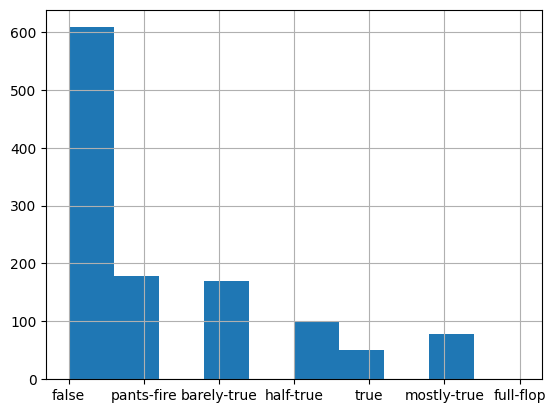

In [130]:
justinqbui_2_df['rating'].hist()

In [131]:
justinqbui_2_df['rating'].value_counts()

rating
false          608
pants-fire     178
barely-true    170
half-true      100
mostly-true     78
true            50
full-flop        1
Name: count, dtype: int64

In [132]:
justinqbui_2_df['adjusted rating'].value_counts()

adjusted rating
false         787
misleading    270
true          128
Name: count, dtype: int64

## Объединение

In [133]:
nanyy1025_df['source'] = 'nanyy1025'
nanyy1025_df['original_label_1'] = nanyy1025_df['label']
nanyy1025_df['label_idx'] = nanyy1025_df['label'].apply(lambda x: 1 if x == 'fake' else 0)
nanyy1025_df = nanyy1025_df[['text', 'label_idx', 'original_label_1', 'source']]
nanyy1025_df.head(1)

,text,label_idx,original_label_1,source
0,The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.,0,real,nanyy1025


In [134]:
justinqbui_1_df['source'] = 'justinqbui_1'
justinqbui_1_df['original_label_1'] = justinqbui_1_df['label']
justinqbui_1_df['label_idx'] = justinqbui_1_df['label'].apply(lambda x: True if x == False else 0).astype(int)
justinqbui_1_df = justinqbui_1_df[['text', 'label_idx', 'original_label_1', 'source']]
justinqbui_1_df.head(1)

,text,label_idx,original_label_1,source
0,Study finds 5G technology a ‘significant factor’ in higher COVID case and death rates,1,False,justinqbui_1


In [135]:
justinqbui_2_df['source'] = 'justinqbui_2'
justinqbui_2_df['original_label_1'] = justinqbui_2_df['rating']
justinqbui_2_df['original_label_2'] = justinqbui_2_df['adjusted rating']

justinqbui_2_df['label_idx'] = justinqbui_2_df['adjusted rating'].apply(lambda x: 1 if x == 'false' else 0)

justinqbui_2_df = justinqbui_2_df[['claim', 'label_idx', 'original_label_1', 'original_label_2', 'source']]
justinqbui_2_df.rename(columns={'claim': 'text'}, inplace=True)
justinqbui_2_df.head(1)

,text,label_idx,original_label_1,original_label_2,source
0,"Deaths from vaccines have totaled 1,621 from Johnson & Johnson, 4,799 from Moderna, 13,039 from Pfizer and 73 from unknown vaccines. And this is an undercount because “only 1% of deaths are reported.”",1,false,false,justinqbui_2


In [136]:
combined_df = pd.concat([nanyy1025_df, justinqbui_1_df, justinqbui_2_df], ignore_index=True)

In [137]:
combined_df.sample(5)

,text,label_idx,original_label_1,source,original_label_2
3217,"Chinese pet owners are killing their cats and dogs by throwing them out of the window, in fear of their pets spreading the coronavirus. This comes after memos were issued by authorities for pet owners to get rid of their animals.",1,fake,nanyy1025,NaN
2974,Sign up for our newsletter to get updates from The COVID Tracking Project and opportunities to take action for better data: https://t.co/aaJlWd6YUZ,0,real,nanyy1025,NaN
14110,“There is no discernible difference between the spread and deaths of COVID in Virginia than there is in Florida.”,1,false,justinqbui_2,false
2437,Says Kamala Harris wants to eliminate beef.,1,fake,nanyy1025,NaN
5074,3⃣We must move heaven &amp; earth to ensure equitable access to diagnostics therapeutics &amp; vaccines. We continue to call on all countries to use every tool at their disposal to suppress #COVID19 transmission &amp; save lives until &amp; after we have a vaccine-@DrTedros #UNGA #UN75,0,real,nanyy1025,NaN


In [138]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14928 entries, 0 to 14927
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              14928 non-null  object
 1   label_idx         14928 non-null  int64 
 2   original_label_1  14928 non-null  object
 3   source            14928 non-null  object
 4   original_label_2  1185 non-null   object
dtypes: int64(1), object(4)
memory usage: 583.3+ KB


In [139]:
combined_df['original_label_1'].value_counts()

original_label_1
real           5600
fake           5100
False          2929
false           608
pants-fire      178
barely-true     170
True            114
half-true       100
mostly-true      78
true             50
full-flop         1
Name: count, dtype: int64

In [140]:
combined_df['label_idx'].value_counts()

label_idx
1    8816
0    6112
Name: count, dtype: int64

## Синтетика данных

In [141]:
negative_file = DATA_SYNTHETIC / 'negative_text.txt'
positive_file = DATA_SYNTHETIC / 'positive_text.txt'

def create_dataframe_from_file(file_path: Path, label_idx: int) -> pd.DataFrame:
    data = []
    with file_path.open('r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line:
                data.append({'text': line, 'label_idx': label_idx})
    
    return pd.DataFrame(data)

negative_df = create_dataframe_from_file(negative_file, label_idx=1)
positive_df = create_dataframe_from_file(positive_file, label_idx=0)

synthetic_df = pd.concat([negative_df, positive_df], ignore_index=True)

In [142]:
synthetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1344 non-null   object
 1   label_idx  1344 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 21.1+ KB


In [143]:
synthetic_df.sample(5)

,text,label_idx
24,The virus was created to reduce the global population.,1
1099,"Some vaccines, like the flu shot, can cause mild flu-like symptoms as a side effect. These are not the same as getting the flu itself. The vaccine cannot cause the illness it is designed to prevent.",0
682,Holding a coin in your hand while receiving the vaccine boosts its absorption rate.,1
752,"Vaccines suppress your natural immune system, making you more dependent on future booster shots. This is why vaccinated people still get sick just as often as those who aren’t. It’s all part of a cycle to keep you buying more vaccines.",1
623,Vaccines can improve your handwriting if taken while holding a pen.,1


## Комментарии

In [144]:
from datasets import load_dataset
import pandas as pd

def load_reddit_dataset(dataset_name="beenakurian/reddit_comments_subreddit_canada", cache_dir=None) -> pd.DataFrame:
    dataset = load_dataset(dataset_name, cache_dir=cache_dir)
    df = dataset['train'].to_pandas()
    df.rename(columns={'comment': 'text'}, inplace=True)    
    df['original_label_1'] = df['sentiment']
    df['label_idx'] = 2  
    df['source'] = 'reddit_canada'
    return df[['text', 'label_idx', 'original_label_1', 'source']]

def load_toxic_comments_dataset(dataset_name="AiresPucrs/toxic-comments", cache_dir=None) -> pd.DataFrame:
    dataset = load_dataset(dataset_name, cache_dir=cache_dir)
    df = dataset['train'].to_pandas()
    df.rename(columns={'comment_text': 'text'}, inplace=True)
    df['original_label_1'] = df['toxic']
    df['label_idx'] = 2
    df['source'] = 'toxic_comments'
    return df[['text', 'label_idx', 'original_label_1', 'source']]


In [145]:
reddit_df = load_reddit_dataset(cache_dir=DATA_CACHE)
toxic_df = load_toxic_comments_dataset(cache_dir=DATA_CACHE)

In [146]:
toxic_df_sample = toxic_df.sample(10000)

In [147]:
toxic_df_sample.sample(5)

,text,label_idx,original_label_1,source
61682,neither mum sex,2,0,toxic_comments
264,currently blocked editing unable add tag however take picture,2,1,toxic_comments
51081,fucking cunt please stop existing,2,0,toxic_comments
6642,hyperlinks removed,2,1,toxic_comments
9860,january,2,1,toxic_comments


# Общий датафрейм

In [148]:
synthetic_df['source'] = 'synthetic'
final_df = pd.concat([combined_df, synthetic_df, reddit_df, toxic_df_sample], ignore_index=True)
final_df.to_excel(DATA_PATH / 'covid_vaccine_fake.xlsx', index=False)

In [149]:
idx2label = {
    0: "Real",
    1: "Fake",
    2: "Comments"
}

final_df['label_str'] = final_df['label_idx'].map(idx2label)

In [150]:
final_df['label_str'].value_counts()

label_str
Comments    16908
Fake         9665
Real         6607
Name: count, dtype: int64

In [151]:
final_df.sample(10)

,text,label_idx,original_label_1,source,original_label_2,label_str
27560,still disputed several sections article added iskapoo vikramsingh regularly removed censored itaqallah others article still dispute please remove tag disputes involving article resolved wish know dispute read talk page find long discussion realize recent inactivity due several persons including iskapoo vikramsingh giving hope maintaining balanced viewpoint due constant censorship itaqallah others sure understand tags put clearly controversial unsourced content article alludes looks like heap...,2,1,toxic_comments,NaN,Comments
13112,Relevant information on Ghana’s coronavirus official website wiped off,0,True,justinqbui_1,NaN,Real
3956,In the last 2 weeks of July 97K U.S. children tested positive for COVID +40%. While some students head back to the classroom other students log on for virtual learning due to new infections among students and teachers. Read more: https://t.co/wsnM1MYoC2,0,real,nanyy1025,NaN,Real
15728,Getting vaccinated weakens your immune system permanently.,1,NaN,synthetic,NaN,Fake
7392,"_A WhatsApp a video features Rabbi Dan Ben Avraham International President of the Netzarita AMI Alliance according to their Twitter. In the video the rabbi says ""the Israeli Minister of Health has officially declared that Israel has the coronavirus vaccine."" And ""Israel has the vaccine already.""_",1,fake,nanyy1025,NaN,Fake
3021,"The Washington Post has published an editorial whose title is ""Either wild capitalism dies or civilization dies.""",1,fake,nanyy1025,NaN,Fake
32830,natalya russian one freckle girl remove like say well stuck head little skunk hole little skunk said well bless soul take take take remove well take little skunk said take wish take take take remove psssssss removed late worthy mighty encyclopedia like indeed,2,0,toxic_comments,NaN,Comments
12774,France has announced a ban on Africans traveling to Europe if they refuse the European vaccine for COVID-19.,1,False,justinqbui_1,NaN,Fake
31741,decline niggers jews bad news also cock hard time rape lol,2,0,toxic_comments,NaN,Comments
15656,Vaccines are less effective in people who don’t get enough sunlight. Vitamin D plays a critical role in supporting immunity. Spend at least 15 minutes outdoors daily before your appointment.,1,NaN,synthetic,NaN,Fake


In [152]:
import re

def clean_text(text):
    text = re.sub(r'#\S+', '', text)  # Удаление хэштегов
    text = re.sub(r'@\S+', '', text)  # Удаление упоминаний
    text = re.sub(r'http\S+|www\.\S+', '', text)  # Удаление ссылок
    return text.strip()  # Удаление лишних пробелов

final_df['text'] = final_df['text'].apply(clean_text)

In [153]:
final_df.sample(10)

,text,label_idx,original_label_1,source,original_label_2,label_str
17500,id like to see some credible evidence of that being the case,2,NEU,reddit_canada,NaN,Comments
5660,"Bharat Biotech’s COVID-19 vaccine will be available in the market from 15 August, according to a letter from ICMR about fast-tracking the clinical trials of the vaccine.",1,fake,nanyy1025,NaN,Fake
22396,did any of them feel that simply mentioning that he used to be a young liberal broke any sort of convention,2,NEU,reddit_canada,NaN,Comments
2144,"You’re buying a false story. My mom is in a nursing home, stage 4 dementia, lifelong asthma. She had COVID with no symptoms. You want to know why? She has taken vitamin D for 20 years. There is a 99.8% survival rate. Wake up and take off the damn masks already.",1,fake,nanyy1025,NaN,Fake
3130,"Just stop it. And enjoy pain for next 30 days. Make a tick on calendar after every day. And when you feel urge, postpone for 10 min. \nBefore that, just throw away all packets in garbage. Corona is excuse enough to not visit shops to get them for safety of your near ones.",1,fake,nanyy1025,NaN,Fake
49,Scientists at AstraZeneca complain their work on a coronavirus vaccine keeps being delayed by Noddy Holder ringing up to ask if it will be ready by Christmas,1,fake,nanyy1025,NaN,Fake
10262,📢 ✅India's recovery rate improves to 77.77% as on September 12 2020 📍Steady improvement in India's COVID-19 recovery rate since initiation on March 25 2020 Via,0,real,nanyy1025,NaN,Real
24791,wikipedia meetup birmingham_ live brum thought let know meetup planned great interested joined discussion anyway enjoying adminship parkin,2,1,toxic_comments,NaN,Comments
13699,"Says the 2019 coronavirus ""causes sudden death syndrome.""",1,False,justinqbui_1,NaN,Fake
32381,hahaha dont actually believe bullshit telling right talking access country representatives government kim jong two totally different things although could understand stupidity since north koreans think kim jong governement saying troll somewhere else kid,2,0,toxic_comments,NaN,Comments


In [154]:
final_df.to_excel(DATA_PATH / 'covid_vaccine_fake_clear.xlsx', index=False)